In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman

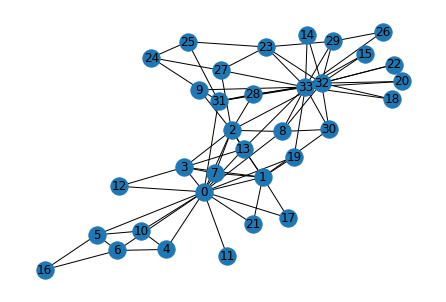

In [2]:
G = nx.karate_club_graph()
nx.draw(G, with_labels=True)


Community 1 : [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]
Community 2 : [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


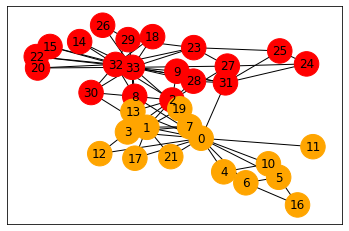

In [3]:
communities = girvan_newman(G)
node_groups = []
for com in next(communities):
  node_groups.append(list(com))

for i in range(len(node_groups)):
  print("Community",(i+1),":", node_groups[i])
  color_map = []
  for node in G:
    if node in node_groups[0]:
        color_map.append('orange')
    else: 
        color_map.append('red')  
graph = nx.draw_networkx(G,node_size=600,node_color=color_map)
plt.show()

QUESTION 2


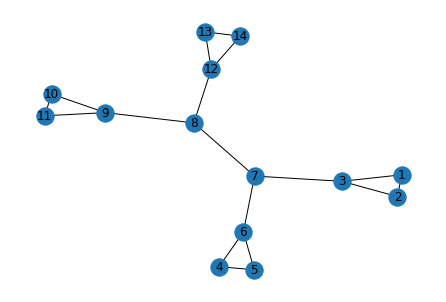

In [5]:

#create a graph
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(2,3)

G.add_edge(5,6)
G.add_edge(5,4)
G.add_edge(4,6)

G.add_edge(9,10)
G.add_edge(11,10)
G.add_edge(9,11)

G.add_edge(12,13)
G.add_edge(13,14)
G.add_edge(12,14)

G.add_edge(7,8)
G.add_edge(3,7)
G.add_edge(6,7)

G.add_edge(9,8)
G.add_edge(12,8)

G.edges(data=True)
nx.draw(G, with_labels = True)

[1, 2, 3]
[4, 5, 6]
[9, 10, 11]
[12, 13, 14]
[7]
[8]


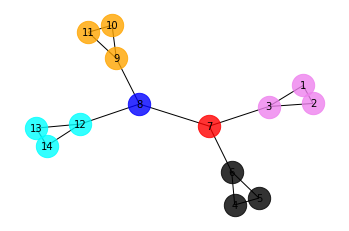

In [6]:
import community.community_louvain as c
import networkx as nx
import matplotlib.pyplot as plt
import sys
import pylab
import copy

pylab.show()

def removeEdges(G): 
	remove = []
	b = nx.edge_betweenness_centrality(G)
	max_betweenness = b[max(b,key=b.get)]
	for k,v in b.items():
	    if v==max_betweenness:
	        remove.append(k)
	
	G.remove_edges_from(remove)
	graphs = list(nx.connected_components(G))

	d={}
	counter = 0
	for graph in graphs:
		counter+=1
		for node in graph:
			d[node]=counter

	if G.number_of_edges() == 0:
		return [list(nx.connected_components(G)),0,G]

	m = c.modularity(d,G)
	return [list(nx.connected_components(G)),m,G]
		

if __name__=="__main__":

	result_communities=[]
	copyGraph = copy.deepcopy(G)
	d={}
	for node in G:
		d[node]=0	
	initial_modularity = c.modularity(d, G)
	result_communities.append([d,initial_modularity,G])

	while G.number_of_edges()>0:
		subgraphs = removeEdges(G)
		result_communities.append(subgraphs)
		G=subgraphs[-1]
	
	for step in result_communities:
		if step[1]>initial_modularity:
			ng=step[0]
			result=[]
			modularity=step[1]
			
			for graph in step[0]:
				result.append(sorted([int(vertex) for vertex in graph]))

	for community in result:
		print(community) 

	d={};counter=0
	
	for graph in ng:
		for node in graph:
			d[node] = counter 
		counter+=1

	

	pos=nx.spring_layout(copyGraph)
	colors = ["violet","black","orange","cyan","red","blue","green","yellow","indigo","pink"]
	for i in range(len(ng)):
		graph=ng[i]
		nlist = [node for node in graph]
		nx.draw_networkx_nodes(copyGraph,pos,nodelist=nlist,node_color=colors[i%10],node_size=500,alpha=0.8)

	nx.draw_networkx_edges(copyGraph,pos)
	nx.draw_networkx_labels(copyGraph,pos,font_size=10)
	plt.axis('off')